# <center> Trabalho 04 - Introdução ao Processamento de Imagem Digital </center>

**Aluno(a):** Marianna de Pinho Severo <br>
**RA:** 264960 <br>
**Professor:** Hélio Pedrini

### Passo 01: Importar bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

### Passo 02: Definir funções auxiliares

In [2]:
def print_image(image, color=0):
    
    plt.figure(figsize=(10,10))
    
    if not color:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)

In [3]:
def imshow_components(labels): #Refereciar stack overflow
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    print_image(labeled_img)
#     cv.imshow('labeled.png', labeled_img)
#     cv.waitKey()

In [50]:
def imshow_components_rectagles(labels, stats): #Refereciar stack overflow
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    for stat in stats:
        cv.rectangle(labeled_img, (stat[0], stat[1]), (stat[0]+stat[2], stat[1]+stat[3]), (255, 255, 255), 3) 
    
    
    print_image(labeled_img,1)
#     cv.imshow('labeled.png', labeled_img)
#     cv.waitKey()

In [5]:
def getBlackPixelsRate(image,stat,color=1): #Black is considered 1 and White is considered 0
    init_x = stat[0]
    init_y = stat[1]
    dx = stat[2]
    dy = stat[3]
    
    area = (dx)*(dy)
    
    aux_image = image[init_y: init_y+dy,init_x:init_x + dx]
    aux_image = aux_image[aux_image == color]
    
    return len(aux_image)/area, len(aux_image), area

In [6]:
def getTransitionsRate(image, stat, total_black): #Black is 1 and White is 0
    
    if total_black == 0:
        return 0,0,0,0
    
    init_x = stat[0]
    init_y = stat[1]
    dx = stat[2]
    dy = stat[3]
    
    hor_count = 0
    ver_count = 0
    
    max_y = init_y+dy
    max_x = init_x+dx
    
    for line in range(init_y, max_y):
        for col in range(init_x, max_x):
            north = line - 1
            south = line + 1
            west = col - 1
            east = col + 1
            
            #left neighbor
            if west >= 0 and (image[line, col] == 0 and image[line,west] == 1):
                hor_count+=1
                
            # right neighbor
            if east < max_x and (image[line, col] == 0 and image[line,east] == 1):
                hor_count+=1
                
            #top neighbor
            if north >= 0 and (image[line,col] == 0 and image[north, col] == 1):
                ver_count+=1
                
            #bottom neighbor
            if south < max_y and (image[line,col] == 0 and image[south, col] == 1):
                ver_count+=1
            
    return (hor_count + ver_count)/total_black, hor_count, ver_count,total_black

### Passo 03: Ler imagem

A imagem que vamos usar neste projeto é do tipo *Portable Bitmap* (PBM). Dessa maneira, esperamos que os pixels do objeto (pixels pretos) sejam representados por valores iguais a 1 e os pixels do fundo (brancos) por valores iguais a 0.

Quando lemos essa imagem utilizando o método **imread** do *opencv*, a imagem é lida no formato monocromático, o que significa que seus valores poderão apresentar valores no intervalo de 0 a 255. Como na imagem lida só existem dois valores diferentes de pixels (0 e 255) e os valores 0 são atribuídos aos objetos, enquanto os valores 255 são atribuídos ao fundo, faremos a negação dessa imagem e dividiremos as intensidades de seus pixels por 255, de maneira a obtermos um arranjo de pixels como o esperado para uma imagem do tipo PBM. 

In [7]:
image = cv.imread('input_images/bitmap.pbm',0)
image = cv.bitwise_not(image)//255
image.shape

(1374, 2233)

### Aplicando dilatação 1

In [8]:
kernel_dilate_1 = np.ones((6,6),np.uint8)
kernel_dilate_1

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]], dtype=uint8)

In [9]:
image_p1 = cv.dilate(np.copy(image), kernel_dilate_1)

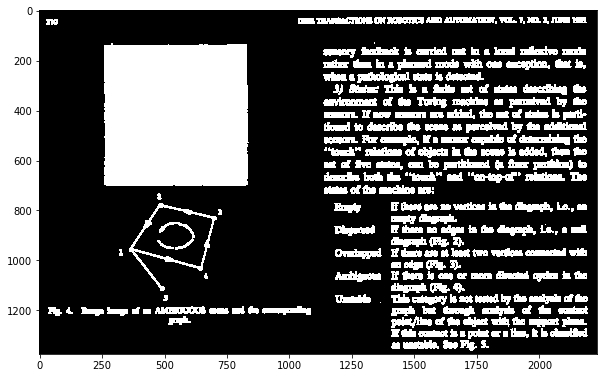

In [10]:
print_image(image_p1)

### Aplicar erosão 1

In [11]:
kernel_erode_1 = np.ones((1,3), np.uint8)
kernel_erode_1

array([[1, 1, 1]], dtype=uint8)

In [12]:
image_p2 = cv.erode(np.copy(image_p1), kernel_erode_1)

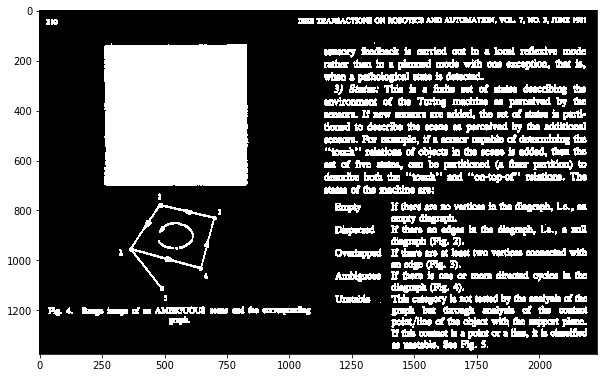

In [13]:
print_image(image_p2)

### Aplicar dilatação 2

In [14]:
kernel_dilate_2 = np.ones((10,1), np.uint8)

In [15]:
image_p3 = cv.dilate(np.copy(image_p2), kernel_dilate_2)

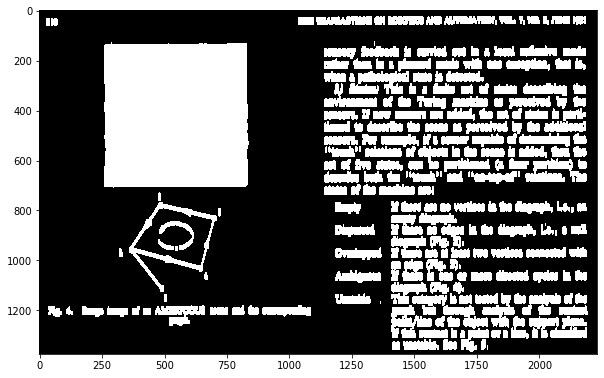

In [16]:
print_image(image_p3)

### Aplicar erosão 2

In [17]:
kernel_erode_2 = np.ones((1,3), np.uint8)
kernel_erode_2

array([[1, 1, 1]], dtype=uint8)

In [18]:
image_p4 = cv.erode(np.copy(image_p3), kernel_erode_2)

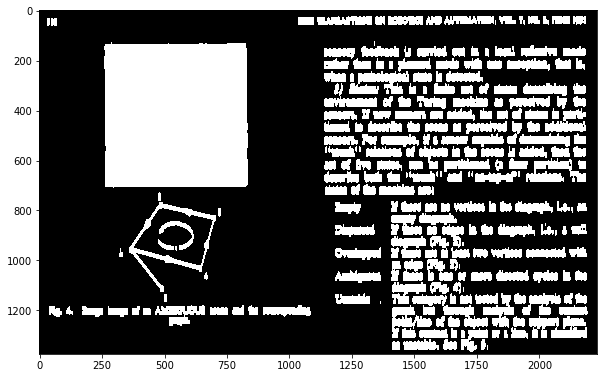

In [19]:
print_image(image_p4)

### Aplicar interseção

In [20]:
image_p5 = cv.bitwise_and(np.copy(image_p2), np.copy(image_p4))

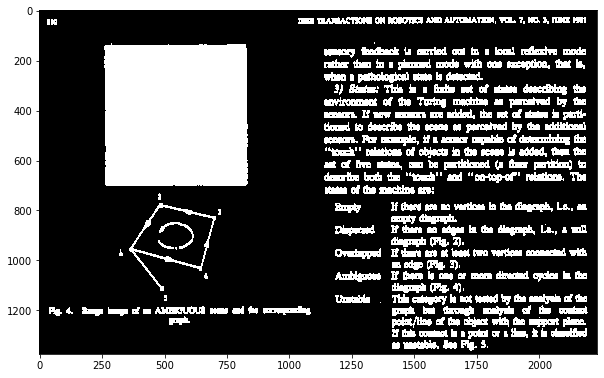

In [21]:
print_image(image_p5)

### Aplicar fechamento

In [22]:
kernel_close_1 = np.ones((1,8), np.uint8)
kernel_close_1

array([[1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

In [23]:
image_p6 = cv.morphologyEx(np.copy(image_p5), cv.MORPH_CLOSE, kernel_close_1)

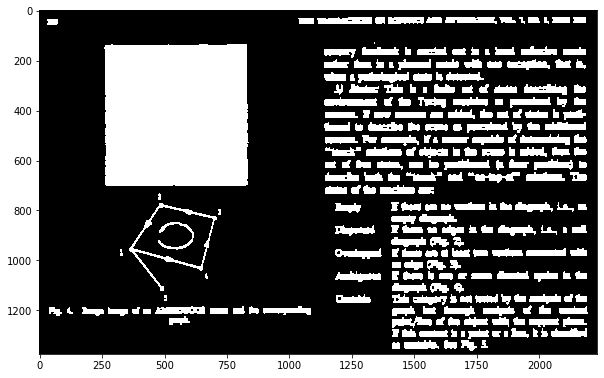

In [24]:
print_image(image_p6)

#### Etapa 07: Identificação de componentes conexos na imagem da etapa 06

In [25]:
number_of_labels, image_labels, stats, centroids = cv.connectedComponentsWithStats(image_p6, connectivity = 8)

In [26]:
print(number_of_labels)

251


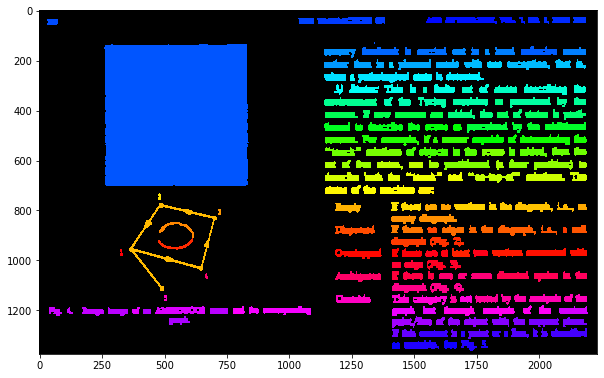

In [27]:
imshow_components(np.copy(image_labels))

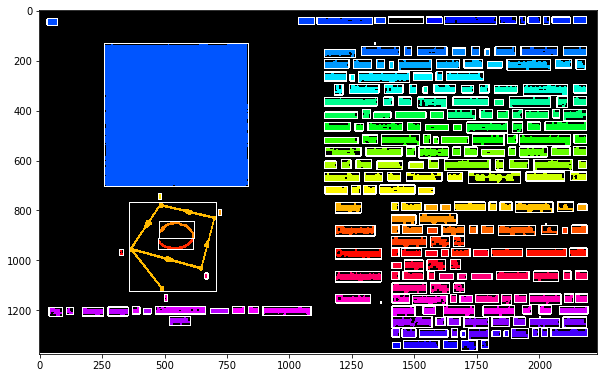

In [28]:
imshow_components_rectagles(np.copy(image_labels),stats)

#### Etapa 8: calcular razões para os componentes conexos obtidos na etapa 7

##### a) Calcular razão entre o número de pixels pretos e o número total de pixels, para cada retângulo envolvendo um componente conexo

In [29]:
black_pixels_ratios={}
black_pixels_amount = {}
component_area = {}

In [30]:
for label, stat in zip(range(number_of_labels),stats):
    black_pixels_ratios[label], black_pixels_amount[label], component_area[label] = getBlackPixelsRate(np.copy(image_p6),stat)

In [31]:
for label in black_pixels_ratios:
    print('Componente:{} | Ratio:{} | Blacks:{} | Area:{}'.format(label,black_pixels_ratios[label], black_pixels_amount[label], component_area[label]))

Componente:0 | Ratio:0.26355853151516456 | Blacks:808635 | Area:3068142
Componente:1 | Ratio:0.9123630672926447 | Blacks:3498 | Area:3834
Componente:2 | Ratio:0.8901098901098901 | Blacks:1458 | Area:1638
Componente:3 | Ratio:0.7600961538461538 | Blacks:4743 | Area:6240
Componente:4 | Ratio:0.7669683257918553 | Blacks:1356 | Area:1768
Componente:5 | Ratio:0.5318840579710145 | Blacks:367 | Area:690
Componente:6 | Ratio:0.8615384615384616 | Blacks:1120 | Area:1300
Componente:7 | Ratio:0.6181818181818182 | Blacks:408 | Area:660
Componente:8 | Ratio:0.9621917808219178 | Blacks:1756 | Area:1825
Componente:9 | Ratio:0.896575821104123 | Blacks:1283 | Area:1431
Componente:10 | Ratio:0.8818818818818819 | Blacks:5286 | Area:5994
Componente:11 | Ratio:0.9148351648351648 | Blacks:999 | Area:1092
Componente:12 | Ratio:0.9495192307692307 | Blacks:1580 | Area:1664
Componente:13 | Ratio:0.924865831842576 | Blacks:1034 | Area:1118
Componente:14 | Ratio:1.0 | Blacks:27 | Area:27
Componente:15 | Ratio:0.9

In [32]:
np.sort(list(component_area.values()))

array([     12,      12,      12,      27,     300,     312,     325,
           338,     350,     408,     432,     450,     450,     468,
           494,     494,     513,     651,     660,     690,     726,
           728,     800,     812,     825,     825,     840,     840,
           850,     850,     850,     850,     870,     924,     925,
           936,     945,     945,     945,     957,     962,     972,
           972,     975,     980,     986,     986,     990,     990,
           990,     992,    1023,    1054,    1054,    1054,    1085,
          1088,    1092,    1118,    1120,    1188,    1200,    1224,
          1224,    1250,    1250,    1295,    1295,    1295,    1300,
          1312,    1330,    1330,    1330,    1352,    1360,    1368,
          1380,    1380,    1380,    1431,    1440,    1450,    1456,
          1470,    1508,    1560,    1560,    1584,    1590,    1606,
          1617,    1632,    1632,    1632,    1632,    1632,    1638,
          1638,    1

##### b) Razão entre o número de transições de branco para preto e o número de pixels pretos, para cada retângulo envolvendo um componente conexo

In [33]:
transition_ratios={}
hor_tran_amount = {}
ver_tran_amount = {}
total_black_amount = {}

In [34]:
for label, stat in zip(range(number_of_labels),stats):
    transition_ratios[label], hor_tran_amount[label], ver_tran_amount[label], total_black_amount[label] = getTransitionsRate(np.copy(image_p6), stat, black_pixels_amount[label])

In [35]:
for label in transition_ratios:
    print('Componente:{} | Ratio:{} | Horizontal:{}, Vertical:{} | Blacks:{}'.format(label,transition_ratios[label], hor_tran_amount[label], ver_tran_amount[label], total_black_amount[label]))

Componente:0 | Ratio:0.08346410927056089 | Horizontal:23530, Vertical:43962 | Blacks:808635
Componente:1 | Ratio:0.08033161806746712 | Horizontal:39, Vertical:242 | Blacks:3498
Componente:2 | Ratio:0.0720164609053498 | Horizontal:35, Vertical:70 | Blacks:1458
Componente:3 | Ratio:0.11933375500737929 | Horizontal:113, Vertical:453 | Blacks:4743
Componente:4 | Ratio:0.07890855457227139 | Horizontal:46, Vertical:61 | Blacks:1356
Componente:5 | Ratio:0.21525885558583105 | Horizontal:42, Vertical:37 | Blacks:367
Componente:6 | Ratio:0.06964285714285715 | Horizontal:41, Vertical:37 | Blacks:1120
Componente:7 | Ratio:0.18872549019607843 | Horizontal:33, Vertical:44 | Blacks:408
Componente:8 | Ratio:0.02733485193621868 | Horizontal:33, Vertical:15 | Blacks:1756
Componente:9 | Ratio:0.10366328916601715 | Horizontal:45, Vertical:88 | Blacks:1283
Componente:10 | Ratio:0.088157396897465 | Horizontal:88, Vertical:378 | Blacks:5286
Componente:11 | Ratio:0.08008008008008008 | Horizontal:32, Vertical:

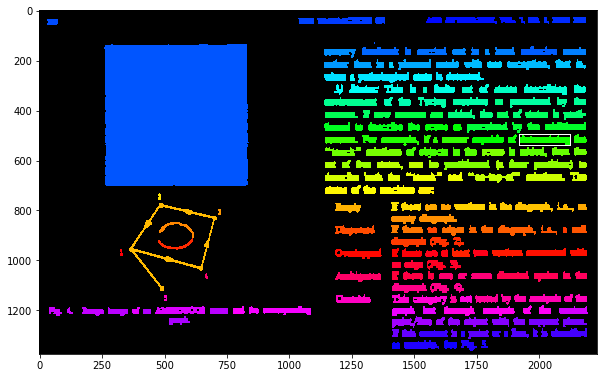

In [36]:
imshow_components_rectagles(image_labels, stats[87:88])

In [37]:
# for key in transition_ratios:
#     if transition_ratios[key] < 0.008 and transition_ratios[key] > 0 :
#         break

In [38]:
np.sort(list(transition_ratios.values()))

array([0.        , 0.        , 0.        , 0.        , 0.00764998,
       0.02511774, 0.02733485, 0.036452  , 0.03945372, 0.04023553,
       0.04565702, 0.04743753, 0.04879636, 0.05010156, 0.05074257,
       0.05227882, 0.05253165, 0.0534005 , 0.05541237, 0.05645161,
       0.0576671 , 0.05838323, 0.05875   , 0.05972533, 0.05995511,
       0.06017505, 0.06034483, 0.06139315, 0.06143345, 0.06302521,
       0.0630861 , 0.06499261, 0.06533718, 0.06564748, 0.06766257,
       0.06772908, 0.06772908, 0.06852926, 0.06964286, 0.07008671,
       0.07014542, 0.07142857, 0.07157058, 0.07198748, 0.07201646,
       0.07202842, 0.07313196, 0.07401177, 0.07432432, 0.07439199,
       0.0755686 , 0.07557398, 0.07578085, 0.07603093, 0.07640232,
       0.07671958, 0.07692308, 0.07738693, 0.07797428, 0.07806691,
       0.07890855, 0.07923497, 0.07949165, 0.07959023, 0.08008008,
       0.08024691, 0.08033162, 0.08044902, 0.08110415, 0.08346411,
       0.08430394, 0.08432776, 0.08505042, 0.08516484, 0.08580

#### Etapa 9: Criar uma regra, baseada na Etapa 8, para determinar se um componente conexo é texto ou não

In [43]:
component_classes = {}

In [44]:
for comp_key in range(number_of_labels):
    if transition_ratios[comp_key] < 0.008:
        component_classes[comp_key] = 0
    else:
        component_classes[comp_key] = 1

In [45]:
for key in component_classes:
    print("Componente:{} | Text: {}".format(key,component_classes[key]))

Componente:0 | Text: 1
Componente:1 | Text: 1
Componente:2 | Text: 1
Componente:3 | Text: 1
Componente:4 | Text: 1
Componente:5 | Text: 1
Componente:6 | Text: 1
Componente:7 | Text: 1
Componente:8 | Text: 1
Componente:9 | Text: 1
Componente:10 | Text: 1
Componente:11 | Text: 1
Componente:12 | Text: 1
Componente:13 | Text: 1
Componente:14 | Text: 0
Componente:15 | Text: 0
Componente:16 | Text: 1
Componente:17 | Text: 1
Componente:18 | Text: 1
Componente:19 | Text: 1
Componente:20 | Text: 1
Componente:21 | Text: 1
Componente:22 | Text: 1
Componente:23 | Text: 1
Componente:24 | Text: 1
Componente:25 | Text: 1
Componente:26 | Text: 1
Componente:27 | Text: 1
Componente:28 | Text: 1
Componente:29 | Text: 1
Componente:30 | Text: 1
Componente:31 | Text: 1
Componente:32 | Text: 1
Componente:33 | Text: 1
Componente:34 | Text: 1
Componente:35 | Text: 1
Componente:36 | Text: 1
Componente:37 | Text: 1
Componente:38 | Text: 1
Componente:39 | Text: 1
Componente:40 | Text: 1
Componente:41 | Text: 1
Co

In [46]:
text_labels = [key for key in component_classes if component_classes[key] == 1]
no_text_labels = [key for key in component_classes if component_classes[key] == 0]
text_stats = stats[text_labels]

text_image = np.copy(image_labels)
for l in no_text_labels:
    text_image[text_image == l] = 0

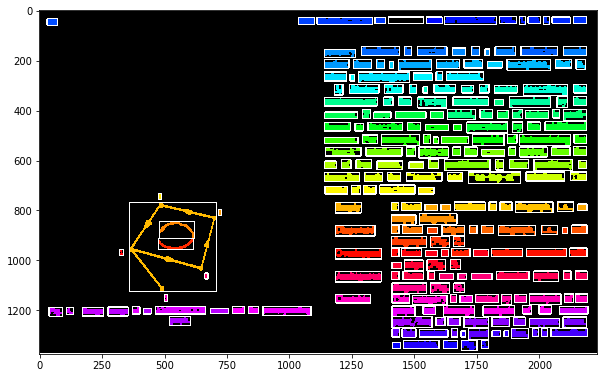

In [51]:
imshow_components_rectagles(text_image, text_stats)

#### Etapa 10: Segmentar palavras, colocar retângulos e calcular quantidades 

##### a) Segmentar palavras

In [ ]:
np.unique(text_image)
text_image = np.uint8(text_image)
teste_i = cv.bitwise_and(image,text_image)

In [ ]:
image_10 = cv.morphologyEx(text_image, cv.MORPH_OPEN, kernel1_30)

In [ ]:
print_image(image_10)

In [48]:
image_labels.shape

(1374, 2233)